In [1]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt

from platform import python_version
from matplotlib import __version__ as plt_ver

print(f'python: {python_version()}')
print(f'\njoypy: {joypy.__version__}')
print(f'pandas: {pd.__version__}')
print(f'matplotlib: {plt_ver}')

python: 3.9.7

joypy: 0.2.6
pandas: 2.0.2
matplotlib: 3.7.1


In [2]:
df_temp = pd.read_csv('../data/city_temperature.csv', low_memory=False)

# drop specific values
df_temp = df_temp[df_temp['AvgTemperature']!=-99.0]

# sample
df_temp[df_temp.Country=='Poland'].sample(3)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
851421,Europe,Poland,NaN,Warsaw,8,21,1997,66.9
851007,Europe,Poland,NaN,Warsaw,7,3,1996,60.2
854096,Europe,Poland,NaN,Warsaw,12,17,2004,29.6


In [3]:
# Convert temperature from Fahrenheit to Celsius
df_temp['AvgTemp_C'] = round((df_temp['AvgTemperature'] - 32) * 5/9, 2)
df_temp = df_temp.rename(columns={'AvgTemperature': 'AvgTemp_F'})
df_temp[df_temp.Country=='Poland'].sample(3)

,Region,Country,State,City,Month,Day,Year,AvgTemp_F,AvgTemp_C
858774,Europe,Poland,NaN,Warsaw,10,7,2017,49.5,9.72
855308,Europe,Poland,NaN,Warsaw,4,12,2008,48.9,9.39
851102,Europe,Poland,NaN,Warsaw,10,6,1996,54.9,12.72


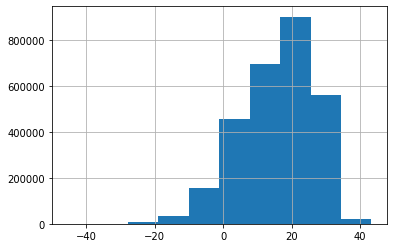

In [4]:
df_temp.AvgTemp_C.hist();

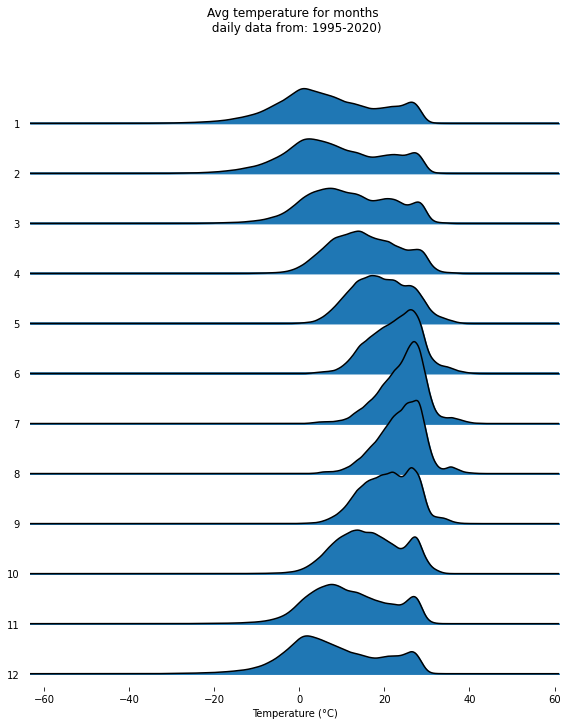

In [5]:
fig, ax = joypy.joyplot(
    df_temp, 
    column = "AvgTemp_C",
    by = "Month", 
    figsize=(8, 10),
    title="Avg temperature for months \n daily data from: 1995-2020)")

ax[-1].set_xlabel('Temperature (°C)')
plt.show()

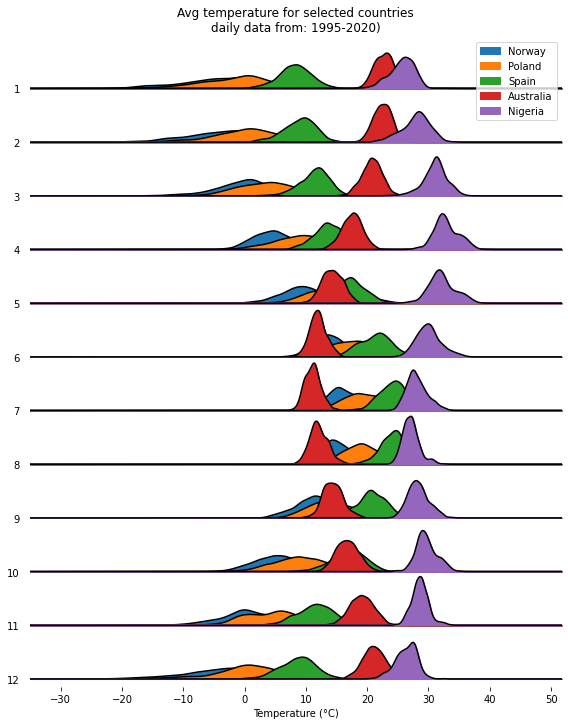

In [6]:
df_years = df_temp.pivot_table(
    index=['Region', 'Year', 'Month', 'Day'], 
    columns='Country', 
    values='AvgTemp_C') \
    .reset_index()

fig, ax = joypy.joyplot(
    df_years, 
    column = ["Norway", "Poland", "Spain", "Australia", "Nigeria"],
    by = "Month", 
    figsize=(8, 10),
    title="Avg temperature for selected countries\ndaily data from: 1995-2020)",
    legend = True)

ax[-1].set_xlabel('Temperature (°C)')
plt.show()